In [1]:
!pip3 install tensorflow

     |████████████████████████████████| 462 kB 7.8 MB/s 


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
###########________________OLD_CODE______________________######################################

import sklearn
from sklearn.model_selection import train_test_split

#Capture training data and labels into respective lists
images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (256, 256))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)
        
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size = 0.7, random_state = 1, shuffle = True)

/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/EMH_mel_spectrogram
/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/EFS_mel_spectrogram
/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/CMA_mel_spectrogram
/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/CFS_mel_spectrogram


In [5]:
###########________________MODIFIED_CODE______________________######################################
import os
import sklearn
from sklearn.model_selection import train_test_split

#Capture training data and labels into respective lists
images = []
labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Speech-Data/mel_spectrogram_from_emotional_dataset/*"):
    data_split=os.path.split(directory_path)
    #label = directory_path.split("\\")[-1]
    label=data_split[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (256, 256))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)
        
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size = 0.7, random_state = 1, shuffle = True)

EMH_mel_spectrogram
EFS_mel_spectrogram
CMA_mel_spectrogram
CFS_mel_spectrogram


In [6]:
#Convert lists to arrays        
train_images = np.array(X_train)
train_labels = np.array(Y_train)

In [7]:
#Convert lists to arrays                
test_images = np.array(X_test)
test_labels = np.array(Y_test)


In [8]:
test_labels

array(['CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'CFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'EMH_mel_spectrogram',
       'CMA_mel_spectrogram', 'CFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'CFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'CMA_mel_spectrogram',
       'EFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'EMH_mel_spectrogram',
       'EFS_mel_spectrogram', 'EFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectro

In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
test_labels[0:8]

array(['CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'CFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'EMH_mel_spectrogram',
       'CMA_mel_spectrogram', 'CFS_mel_spectrogram'], dtype='<U19')

In [11]:
test_labels_encoded[0:8]

array([1, 1, 0, 0, 2, 3, 1, 0])

In [12]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [13]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
!pip3 install tensorflow

In [15]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [17]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

In [19]:
y_test

array([1, 1, 0, 0, 2, 3, 1, 0, 3, 2, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 0,
       2, 1, 2, 0, 1, 3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 0, 0, 1, 1, 2, 1, 3,
       3, 1, 2, 0, 3, 1, 1, 2, 3, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 2, 2, 0,
       3, 1, 0, 1, 1, 0, 3, 2, 0, 3, 1, 3, 0, 1, 2, 2, 0, 0, 0, 0, 3, 2,
       2, 2, 0, 2, 0, 2, 3, 1, 3, 2, 1, 0, 0, 1, 2, 0, 3, 1, 2, 2, 1, 2,
       3, 3, 1, 0, 3, 3, 2, 2, 3, 2, 3, 0, 1, 0, 3, 3, 3, 3, 1, 1, 0, 1,
       1, 1, 1, 0, 3, 1, 3, 2, 2, 3, 2, 1, 3, 0, 2, 3, 1, 1, 0, 3, 0, 3,
       2, 1, 1, 2, 3, 0, 0, 3, 1, 3, 0, 3, 1, 3, 0, 2, 3, 3, 2, 0, 2, 0,
       0, 0, 2, 1])

In [20]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [21]:
print(features.shape)

(420, 32768)


In [22]:
X_for_RF = features #This is our X input to RF

In [23]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [24]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train_one_hot) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
print(RF_model.score(X_for_RF, y_train_one_hot))

1.0


In [26]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)


In [27]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [28]:
print(X_test_features.shape)

(180, 32768)


In [29]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
#y_pred = le.inverse_transform(prediction_RF)

In [30]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_one_hot, prediction_RF))

Accuracy =  0.9333333333333333


In [31]:
!pip3 install xgboost

In [32]:
import xgboost as xgb

In [33]:
xgb_classifier = xgb.XGBClassifier()

In [34]:
y_train, y_train_one_hot

(array([2, 1, 2, 1, 1, 3, 2, 3, 0, 2, 1, 2, 3, 3, 1, 0, 3, 2, 0, 0, 0, 3,
        2, 0, 0, 3, 0, 1, 0, 1, 1, 1, 1, 3, 0, 3, 2, 3, 1, 2, 1, 3, 0, 0,
        0, 2, 2, 1, 0, 2, 3, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 0, 3, 1,
        0, 0, 0, 1, 0, 2, 3, 3, 1, 2, 3, 2, 1, 3, 3, 0, 1, 1, 3, 1, 2, 2,
        2, 2, 1, 1, 2, 3, 2, 0, 0, 2, 1, 0, 0, 3, 1, 3, 1, 0, 3, 1, 3, 3,
        1, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 0, 3, 0, 3, 1, 0, 1, 2, 0, 0, 1,
        3, 1, 3, 0, 0, 2, 3, 2, 1, 2, 2, 3, 3, 3, 0, 3, 2, 1, 2, 2, 0, 3,
        1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 3, 1, 2,
        2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 3, 2, 0, 1, 3, 2,
        0, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 1, 2, 3, 2, 0, 3, 2, 0, 0, 1, 3, 3, 0, 3, 3, 1, 3, 1, 1, 0, 1,
        1, 1, 2, 1, 0, 1, 3, 1, 1, 0, 2, 2, 0, 2, 3, 2, 0, 1, 1, 1, 2, 3,
        3, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 0, 0, 2, 1, 2, 3, 1, 2, 0, 0, 1,
        2, 3, 3, 1, 2, 1, 3, 3, 2, 1, 

In [ ]:
xgb_classifier.fit(X_for_RF, y_train)

In [ ]:
predictions = xgb_classifier.predict(X_test_features)
y_pred = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, y_pred))

Accuracy of Model:: 0.9777777777777777


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [ ]:
svc.fit(X_for_RF, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
#X_for_RF, y_train_one_hot

In [ ]:
predictions = svc.predict(X_test_features)
y_pred = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, y_pred))

Accuracy of Model:: 1.0


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
#estimator = [('rf', RF_model), ('xgb', xgb_classifier), ('svc', svc)]
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = [('rf', RF_model), ('xgb', xgb_classifier), ('svc', svc)], voting ='hard')
vot_hard.fit(X_for_RF, y_train)
#y_pred = vot_hard.predict(X_test_features)
  
# using accuracy_score metric to predict accuracy
#score = metrics.accuracy_score(test_labels, y_pred)
#print("Hard Voting Score % d" % score)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgb', XGBClassifier(objective='multi:softprob')),
                             ('svc', SVC(kernel='linear', random_state=1))])

In [ ]:
y_pred = vot_hard.predict(X_test_features)

In [ ]:
y_pred

array([1, 1, 0, 0, 2, 3, 1, 0, 3, 2, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 0,
       2, 1, 2, 0, 1, 3, 2, 2, 1, 1, 3, 2, 3, 2, 3, 0, 0, 1, 1, 2, 1, 3,
       3, 1, 2, 0, 3, 1, 1, 2, 3, 0, 0, 0, 0, 3, 3, 1, 0, 0, 3, 2, 2, 0,
       3, 1, 0, 1, 1, 0, 3, 2, 0, 3, 1, 3, 0, 1, 2, 2, 0, 0, 0, 0, 3, 2,
       2, 2, 0, 2, 0, 2, 3, 1, 3, 2, 1, 0, 0, 1, 2, 0, 3, 1, 2, 2, 1, 2,
       3, 3, 1, 0, 3, 3, 2, 2, 3, 2, 3, 0, 1, 0, 3, 3, 3, 3, 1, 1, 0, 1,
       1, 1, 1, 0, 3, 1, 3, 2, 2, 3, 2, 1, 3, 0, 2, 3, 1, 1, 0, 3, 0, 3,
       2, 1, 1, 2, 3, 0, 0, 3, 1, 3, 0, 3, 1, 3, 0, 2, 3, 3, 3, 0, 2, 0,
       0, 0, 2, 1])

In [ ]:
test_labels

array(['CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'CFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'EMH_mel_spectrogram',
       'CMA_mel_spectrogram', 'CFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'CFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectrogram',
       'EFS_mel_spectrogram', 'CMA_mel_spectrogram',
       'EFS_mel_spectrogram', 'CFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'EMH_mel_spectrogram',
       'EFS_mel_spectrogram', 'EFS_mel_spectrogram',
       'CMA_mel_spectrogram', 'CMA_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'EFS_mel_spectrogram',
       'EMH_mel_spectrogram', 'CFS_mel_spectro

In [ ]:
score = metrics.accuracy_score(y_test, y_pred)
print("Hard Voting Score %d" %score)

Hard Voting Score 0


In [ ]:
print("Hard Voting Score {}".format(score))

Hard Voting Score 0.9944444444444445


In [ ]:
vot_hard.classes_

array([0, 1, 2, 3])

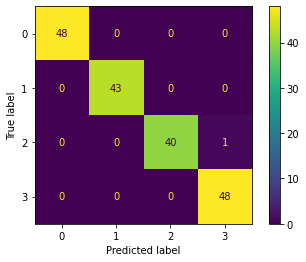

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=vot_hard.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vot_hard.classes_)
disp.plot()
plt.show()

In [ ]:
a=1
print("Hard Voting Score %d" %a)

Hard Voting Score 1


In [ ]:
a=.1
print("Hard Voting Score %d" %a)

Hard Voting Score 0


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))
#[1 1 1 2 2 2]
np.array_equal(eclf1.named_estimators_.lr.predict(X), eclf1.named_estimators_['lr'].predict(X))
True
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))
#[1 1 1 2 2 2]

[1 1 1 2 2 2]
[1 1 1 2 2 2]


In [ ]:
estimator = [('rf', RF_model), ('xgb', xgb_classifier), ('svc', svc)]
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_for_RF, y_train)
y_pred = vot_hard.predict(X_test_features)
  
# using accuracy_score metric to predict accuracy
score = metrics.accuracy_score(test_labels, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [ ]:
def get_voting():
	# define the base models
	models = list()
	models.append('rf', RF_model)
	models.append('xgb', xgb_classifier)
	models.append('svc',svc)

	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	#models['rf'] = KNeighborsClassifier(n_neighbors=1)
	#models['knn3'] = KNeighborsClassifier(n_neighbors=3)
	#models['knn5'] = KNeighborsClassifier(n_neighbors=5)

	models['hard_voting'] = get_voting()
	return models

In [ ]:

 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))